In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/accounts_label_and_cluster_2_20190424.csv')

In [4]:
df[["is_transfer_hub", 'is_witness', 'is_trading_bot']].sum()

is_transfer_hub      61
is_witness           49
is_trading_bot     3479
dtype: int64

In [5]:
pd.options.display.max_columns = None

In [35]:
excluded_columns = ['id', 'name', 'vote_voting_account', 'registrar', 'referrer', 'lifetime_referrer', 'is_transfer_hub', 'is_witness', 'is_trading_bot']
only_active_accounts = 'nb_assets_owned != 0 and lifetime_fees_paid != 0 and total_ops > 1'
df = df.query(only_active_accounts)
df_numeric_colums = df.drop(excluded_columns, axis='columns')

In [22]:
df_numeric_colums.describe()

auths_owner_count  auths_active_count  vote_num_witness  \
count      246729.000000       246729.000000     246729.000000   
mean            1.018607            1.024695          0.035363   
std             0.187733            0.201810          1.145863   
min             1.000000            1.000000          0.000000   
25%             1.000000            1.000000          0.000000   
50%             1.000000            1.000000          0.000000   
75%             1.000000            1.000000          0.000000   
max             9.000000           10.000000        140.000000   

       vote_num_committee  vote_num_votes  whitelisting_accounts  \
count       246729.000000   246729.000000          246729.000000   
mean             0.015462        0.074300               0.008686   
std              0.426840        1.738609               0.097561   
min              0.000000        0.000000               0.000000   
25%              0.000000        0.000000               0.000000   
50%              0.000000        0.000000               0.000000   
75%              0.000000        0.000000               0.000000   
max             41.000000      204.000000               5.000000   

       blacklisting_accounts  whitelisted_accounts  blacklisted_accounts  \
count          246729.000000         246729.000000         246729.000000   
mean                0.004446              0.010988              0.004856   
std                 0.176706              1.806467              0.765399   
min                 0.000000              0.000000              0.000000   
25%                 0.000000              0.000000              0.000000   
50%                 0.000000              0.000000              0.000000   
75%                 0.000000              0.000000              0.000000   
max                26.000000            571.000000            338.000000   

          total_ops   removed_ops  lifetime_fees_paid  total_core_in_orders  \
count  2.467290e+05  2.467290e+05        2.467290e+05          2.467290e+05   
mean   3.505909e+03  3.457089e+03        2.118424e+07          2.177768e+08   
std    3.757021e+05  3.757017e+05        1.715929e+09          1.921826e+10   
min    2.000000e+00  0.000000e+00        9.000000e+00          0.000000e+00   
25%    1.000000e+01  0.000000e+00        1.138700e+04          0.000000e+00   
50%    3.300000e+01  0.000000e+00        3.811400e+04          0.000000e+00   
75%    1.670000e+02  6.700000e+01        1.809950e+05          0.000000e+00   
max    1.546306e+08  1.546305e+08        6.979938e+11          9.044532e+12   

       core_in_balance  pending_fees  pending_vested_fees  \
count     2.467290e+05      246729.0         2.467290e+05   
mean      7.749098e+08           0.0         8.471433e+01   
std       8.983377e+10           0.0         1.124162e+04   
min       0.000000e+00           0.0         0.000000e+00   
25%       0.000000e+00           0.0         0.000000e+00   
50%       8.500000e+01           0.0         0.000000e+00   
75%       8.360700e+04           0.0         0.000000e+00   
max       2.968645e+13           0.0         4.998178e+06   

       days_since_last_vote  nb_assets_owned  transfer_operation  \
count         246729.000000    246729.000000        2.467290e+05   
mean           17302.433370         8.707708        6.615494e+01   
std             3463.604667        22.923728        6.671368e+03   
min                0.000000         1.000000        0.000000e+00   
25%            18011.000000         2.000000        2.000000e+00   
50%            18011.000000         3.000000        5.000000e+00   
75%            18011.000000         6.000000        1.600000e+01   
max            18011.000000       876.000000        2.927373e+06   

       limit_order_create_operation  limit_order_cancel_operation  \
count                  2.467290e+05                  2.467290e+05   
mean                   1.416893e+03                  1.154695e+03   
std                    1.775874e

In [56]:
#from sklearn.preprocessing import StandardScaler
#x = StandardScaler().fit_transform(df_numeric_colums.values)

#from sklearn.preprocessing import PowerTransformer
#x = PowerTransformer(method='yeo-johnson').fit_transform(df_numeric_colums.values)

from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
scale = StandardScaler()
pipe = Pipeline([('log', log ),
                 ('scale', scale )])
x = pipe.fit_transform(df_numeric_colums.values)

In [6]:
standardizedDf = pd.DataFrame(data = x, columns=df_numeric_colums.columns)

In [12]:
from sklearn.decomposition import PCA

#pca = PCA()
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [13]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[8.38106058 5.15787516 2.95073108 2.91361305 2.46534429 2.41472343
 1.97728949 1.80578633 1.70858716 1.57005266 1.4871915  1.35387212
 1.2797635  1.17259631 1.15547928 1.11509639 1.07686629 1.04239794
 1.03022135 1.01224474 0.99616616 0.98670189 0.97292184 0.9561723
 0.94053329 0.92048701 0.89371849 0.85301331 0.83529623 0.81294996]
[0.12698525 0.07814931 0.04470787 0.04414547 0.03735355 0.03658657
 0.02995881 0.02736029 0.02588758 0.02378858 0.02253311 0.02051313
 0.01939028 0.01776654 0.01750719 0.01689533 0.01631609 0.01579384
 0.01560935 0.01533698 0.01509337 0.01494997 0.01474118 0.0144874
 0.01425045 0.01394672 0.01354113 0.01292439 0.01265595 0.01231737]
[0.12698525 0.20513456 0.24984242 0.2939879  0.33134145 0.36792802
 0.39788683 0.42524712 0.4511347  0.47492328 0.49745639 0.51796952
 0.5373598  0.55512634 0.57263353 0.58952886 0.60584495 0.62163879
 0.63724814 0.65258512 0.66767849 0.68262846 0.69736964 0.71185704
 0.72610748 0.7400542  0.75359533 0.76651973 0.77917568 0.7914

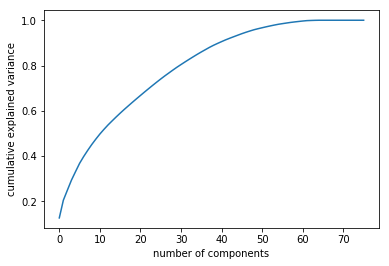

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

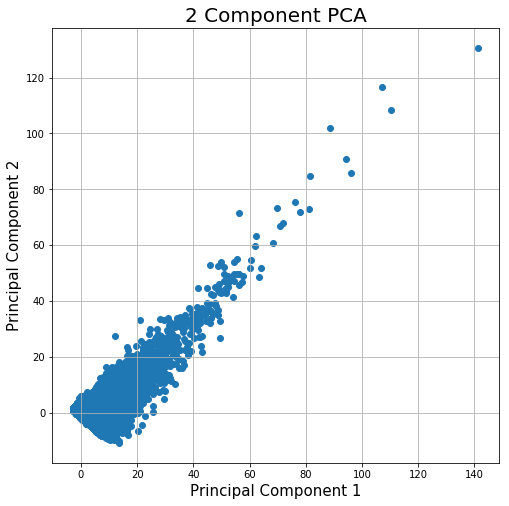

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf[0], principalDf[1])
ax.grid()

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=500,n_jobs=-1, verbose=0)
#kmeans.fit(principalComponents)
#y_kmeans = kmeans.predict(principalComponents)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
df['cluster'] = y_kmeans
standardizedDf['cluster'] = y_kmeans

In [12]:
from collections import OrderedDict
aggs = OrderedDict([
        ('id', 'count'),
        ('is_trading_bot', 'sum'),
        ('is_witness', 'sum'),
        ('is_transfer_hub', 'sum')])

stats = df.groupby('cluster').agg(aggs).rename(columns={"id": "count"})
stats

count  is_trading_bot  is_witness  is_transfer_hub
cluster                                                     
0        168866             0.0         0.0              0.0
1            69             5.0         0.0              1.0
2          9831           816.0         1.0             32.0
3           691            52.0         0.0              3.0
4          2275            53.0         0.0             10.0
5         57449          2399.0         0.0             14.0
6            52             0.0        47.0              0.0
7           548            40.0         0.0              0.0
8             6             1.0         1.0              0.0
9          6942           113.0         0.0              1.0

In [67]:
tag_matching = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / x.sum()))
cluster_fill = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / stats['count']))

In [68]:
(tag_matching.max(axis=1) > 0.5).sum() + (cluster_fill.max(axis=1) > 0.5).sum()

4

Text(0.5, 1.0, 'Cluster accuracy')

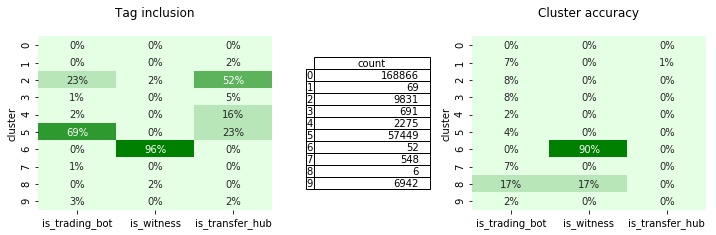

In [69]:
fig,(ax1,tabax, ax2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2, 1, 2]}, figsize=(10,3))
fig.tight_layout()

ax1 = sns.heatmap(tag_matching, annot=True, cmap=sns.light_palette("green"), cbar=False, ax=ax1, fmt='.0%')
ax1.set_title("Tag inclusion")

tabax.axis("off")
tabax.table(cellText=stats[['count']].values,
            rowLabels=stats.index,
            colLabels=['count'],
            cellLoc = 'right', rowLoc = 'center',
            loc='center')

ax2 = sns.heatmap(cluster_fill, annot=True, cmap=sns.light_palette("green"), cbar=False, ax=ax2, fmt='.0%')
ax2.set_title("Cluster accuracy")

In [37]:
from collections import OrderedDict

def compute_score(df):
    aggs = OrderedDict([
        ('id', 'count'),
        ('is_trading_bot', 'sum'),
        ('is_witness', 'sum'),
        ('is_transfer_hub', 'sum')])

    stats = df.groupby('cluster').agg(aggs).rename(columns={"id": "count"})  
    tag_matching = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / x.sum()))
    cluster_fill = stats[['is_trading_bot', 'is_witness', 'is_transfer_hub']].apply(lambda x: (x / stats['count']))
    return (tag_matching.max(axis=1) > 0.5).sum() + (cluster_fill.max(axis=1) > 0.5).sum()

In [ ]:
def true_cluster(row):
    if row.is_witness:
        return 1
    if row.is_trading_bot:
        return 2
    if row.is_transfer_hub:
        return 3
    return 0

cluster_true = df.apply (lambda row: true_cluster(row), axis=1)

In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics

score = 0
i = 0

while score < 4 and i < 100:
    kmeans = KMeans(n_clusters=10, n_init=20, max_iter=500,n_jobs=-1, verbose=0)
    df['cluster'] = kmeans.fit_predict(x)
    score = compute_score(df)
    v_measure_score = metrics.v_measure_score(cluster_true, df['cluster'])    
    print("i = {}, Score = {}, v_measure_score={}".format(i, score, v_measure_score))
    i += 1

df.to_csv(path_or_buf='data/accounts_label_and_cluster_2_20190424.csv', index=False)

i = 0, Score = 3, v_measure_score=0.04065007182165105
i = 1, Score = 3, v_measure_score=0.04264774111874728
i = 2, Score = 3, v_measure_score=0.03463999140683391
i = 3, Score = 3, v_measure_score=0.03577580880438435
i = 4, Score = 3, v_measure_score=0.04288609469675819
i = 5, Score = 3, v_measure_score=0.040295655372924004
i = 6, Score = 3, v_measure_score=0.04041579889811911
i = 7, Score = 3, v_measure_score=0.04265833893055213
i = 8, Score = 3, v_measure_score=0.0359069468735243
i = 9, Score = 3, v_measure_score=0.04265594707881708
i = 10, Score = 4, v_measure_score=0.04027522594831358


In [31]:
df.query("cluster == 7")

id                       name  auths_owner_count  \
13          1.2.138                       cctv                  1   
22          1.2.159                       ebit                  1   
29          1.2.179                     harvey                  1   
40          1.2.202                     koocaa                  1   
45          1.2.213                     mf-tzo                  1   
52          1.2.225                  neuronics                  1   
73          1.2.282                      xeroc                  1   
76          1.2.285                        yao                  1   
85          1.2.310                 bytemaster                  1   
91          1.2.336                  spartako1                  1   
104         1.2.376                   liondani                  1   
110         1.2.427                        ags                  1   
133        1.2.1090                      angel                  1   
134         1.2.623           chinesecommunity                  1   
142         1.2.666                       dacs                  1   
148         1.2.723                       guru                  1   
175         1.2.873                 bitcoiners                  1   
198        1.2.1120                       code                  1   
271        1.2.2204                      baozi                  1   
272        1.2.2214                        ems                  1   
292        1.2.2576                         k1                  1   
293        1.2.2588                    newtree                  1   
341        1.2.3061                      still                  4   
351        1.2.3180                        wys                  1   
399        1.2.4064                    lzr1900                  1   
411        1.2.4273                     wall-e                  1   
450        1.2.5178                       cass                  2   
458        1.2.5420                   ptschina                  1   
464        1.2.5532                 zuckerberg                  1   
467        1.2.5549                      arhag                  1   
...             ...                        ...                ...   
212795  1.2.1074128              p5ktjuzy06lnb                  1   
214320  1.2.1079674                     hou321                  1   
215020  1.2.1082261                   newbizz7                  1   
216518  1.2.1087590                  brickoj86                  1   
217732  1.2.1092782                    regtech                  1   
219624  1.2.1099871                   yip-btsp                  1   
220333  1.2.1102649                     bun-go                  1   
221951  1.2.1107981                    suptech                  1   
221955  1.2.1107986                    paytech                  1   
222390  1.2.1109330                       beos                  1   
223896  1.2.1114370  panconpalta-long-altcoins                  1   
224161  1.2.1115177           dale-satoshihot1                  1   
225952  1.2.1120617              iobanker-core                  1   
227772  1.2.1145607          bitspark-fortress                  1   
228234  1.2.1147053                  hantoaye1                  1   
228677  1.2.1148184                    cn-vote                  1   
229659  1.2.1152247                      vote0                  1   
230276  1.2.1157747   lil-bi.t-of-techs-us.usa                  1   
230778  1.2.1159388                 bitcoin-sv                  2   
231816  1.2.1209453                 dls.cipher                  1   
232053  1.2.1210359                      b-dex                  1   
234185  1.2.1219552                  stability                  1   
236176  1.2.1273162                     dpola1                  1   
236698  1.2.1290533                   fresh118                  1   
238026  1.2.1525669                     vvk123                  1   
238093  1.2.1530380          bitspark-delegate                  1   
240081  1.2.157

In [58]:
centersDf = pd.DataFrame(data = kmeans.cluster_centers_, columns=df.drop(excluded_columns, axis='columns').columns)
centersDf

auths_owner_count  auths_active_count  vote_num_witness  \
0          -0.009631           -0.069772         -0.029918   
1           0.371828            0.530670         -0.029918   
2           0.985900            1.482253         26.242030   
3           0.120658            0.277506         -0.029918   
4           2.130261            1.829817         12.901960   

   vote_num_committee  vote_num_votes  whitelisting_accounts  \
0           -0.023708       -0.040612              -0.031552   
1           -0.023708        0.587222               0.489158   
2           20.792107       24.483891               0.999131   
3           -0.023708        0.018278               0.151379   
4           10.261273       13.016719               3.093550   

   blacklisting_accounts  whitelisted_accounts  blacklisted_accounts  \
0              -0.018992             -0.010792             -0.009136   
1               0.501494              1.283427              0.999265   
2               1.509691              1.978729              2.093699   
3               0.075990             -0.010792             -0.009136   
4               0.822708              6.219110              6.430340   

   total_ops  removed_ops  lifetime_fees_paid  total_core_in_orders  \
0  -0.330412    -0.227615           -0.399117             -0.055717   
1   0.162485     1.381482            1.004069              1.026775   
2   2.070998     3.009833            2.271352              3.594634   
3   1.875362     1.224609            2.232681              0.247216   
4   2.161042     3.805350            2.278390              4.318092   

   core_in_balance  pending_fees  pending_vested_fees  days_since_last_vote  \
0        -0.300064           0.0            -0.017002              0.080434   
1         1.363244           0.0             0.216102             -1.246778   
2         2.607291           0.0             0.315401            -12.338363   
3         1.645344           0.0             0.079891             -0.311978   
4         2.679081           0.0            12.343341             -9.010265   

   nb_assets_owned  transfer_operation  limit_order_create_operation  \
0        -0.321113           -0.328860                     -0.392162   
1         0.933123            0.934943                      0.931137   
2         1.900791            2.056842                      2.270574   
3         1.790358            1.833573                      2.196049   
4         1.951700            2.073721                      1.851039   

   limit_order_cancel_operation  call_order_update_operation  \
0                     -0.339912                    -0.087578   
1                      0.994066                     1.769979   
2                      2.415987                     5.515322   
3                      1.891982                     0.383965   
4                      1.852112                     4.714572   

   fill_order_operation  account_create_operation  account_update_operation  \
0             -0.386770                 -0.313973                 -0.112417   
1              0.940733                  0.552487                  1.513102   
2              2.279259                  1.615284                  8.697900   
3              2.164605                  1.768026                  0.512732   
4              1.818854                  1.375866                  6.924505   

   account_whitelist_operation  account_upgrade_operation  \
0                    -0.040491                  -0.057992   
1                     0.891906                   8.118198   
2                     2.043307                   5.220519   
3                     0.177198                  -0.057992   
4                     4.123094                  10.264922   

   account_transfer_operation  asset_create_operation  asset_update_operation  \
0                         0.0               -0.027794               -0.023905   
1                         0.0                1.803703                1.480261   
2      

In [ ]:
from sklearn.manifold import TSNE

#use t-sne
X = TSNE(n_components=2, perplexity=20, n_iter=300, verbose=1, learning_rate=100).fit_transform(x)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
plt.scatter(X[:,0], X[:,1], c=colors[kmeans_clustering.labels_])
plt.title('K-Means (t-SNE)')
plt.show()

In [11]:
df.groupby('cluster').count()

id    name  auths_owner_count  auths_active_count  \
cluster                                                          
0        168866  168866             168866              168866   
1            69      69                 69                  69   
2          9831    9831               9831                9831   
3           691     691                691                 691   
4          2275    2275               2275                2275   
5         57449   57449              57449               57449   
6            52      52                 52                  52   
7           548     548                548                 548   
8             6       6                  6                   6   
9          6942    6942               6942                6942   

         vote_num_witness  vote_num_committee  vote_num_votes  \
cluster                                                         
0                  168866              168866          168866   
1                      69                  69              69   
2                    9831                9831            9831   
3                     691                 691             691   
4                    2275                2275            2275   
5                   57449               57449           57449   
6                      52                  52              52   
7                     548                 548             548   
8                       6                   6               6   
9                    6942                6942            6942   

         vote_voting_account  whitelisting_accounts  blacklisting_accounts  \
cluster                                                                      
0                     168866                 168866                 168866   
1                         69                     69                     69   
2                       9831                   9831                   9831   
3                        691                    691                    691   
4                       2275                   2275                   2275   
5                      57449                  57449                  57449   
6                         52                     52                     52   
7                        548                    548                    548   
8                          6                      6                      6   
9                       6942                   6942                   6942   

         whitelisted_accounts  blacklisted_accounts  total_ops  removed_ops  \
cluster                                                                       
0                      168866                168866     168866       168866   
1                          69                    69         69           69   
2                        9831                  9831       9831         9831   
3                         691                   691        691          691   
4                        2275                  2275       2275         2275   
5                       57449                 57449      57449        57449   
6                          52                    52         52           52   
7                         548                   548        548          548   
8                           6                     6          6            6   
9                        6942                  6942       6942         6942   

         lifetime_fees_paid  total_core_in_orders  core_in_balance  \
cluster                                                              
0                    168866                168866           168866   
1                        69                    69               69   
2                      9831                  9831             9831   
3                       691                   691              691   
4                      2275                  2275             2275   
5                     57449                 57449            57

In [131]:
df_means = df.groupby('cluster').mean()

from sklearn.preprocessing import PowerTransformer
x = PowerTransformer(method='yeo-johnson').fit_transform(df_means.values)

#from sklearn.preprocessing import FunctionTransformer, Normalizer
#from sklearn.pipeline import Pipeline
#pipe = Pipeline([('log', FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True) ),
#                 ('normal', Normalizer() )])
#x = pipe.fit_transform(df_means.values)
df_radar = pd.DataFrame(data = x, columns=df_means.columns, index=df_means.index)

/home/zapata/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [166]:
df.query("cluster == 9" )

id              name  auths_owner_count  auths_active_count  \
1482      1.2.23113               esb                  1                   1   
2039      1.2.31965   holytransaction                  1                   1   
2431      1.2.35917  delegate.kencode                  1                   1   
3675      1.2.98657   bitcoinvestor55                  1                   1   
3839      1.2.99492             ranc4                  1                   1   
4081     1.2.100765            kazu88                  1                   1   
4554     1.2.102776          spde6g59                  1                   1   
4745     1.2.103217         dking7334                  1                   1   
6115     1.2.107421         ch1nshiru                  1                   1   
6981     1.2.110919   thewh0lecatal0g                  1                   1   
7048     1.2.111178     mazainderan-3                  1                   1   
7138     1.2.111504     mazainderan-5                  2                   1   
7151     1.2.111552     mazainderan-6                  2                   1   
7829     1.2.113340    crypto-giraffe                  1                   1   
8139     1.2.114350     mazainderan-9                  1                   1   
8205     1.2.114519    mazainderan-c1                  2                   1   
8589     1.2.115617     abstract-alao                  1                   1   
9658     1.2.125926            block0                  1                   1   
9873     1.2.127114             fab10                  1                   1   
10463    1.2.137370        fire-power                  1                   1   
10500    1.2.138422              mar0                  1                   1   
12496    1.2.158200        cryptoman1                  1                   1   
13514    1.2.163485           okday74                  1                   1   
13953    1.2.166161      pickled-lion                  1                   1   
14067    1.2.166614           in-flux                  1                   1   
14430    1.2.168448          myst40kk                  1                   1   
15083    1.2.171083     altcoin-jesus                  1                   1   
17614    1.2.212948             qz068                  1                   1   
18948    1.2.266491        cylon96113                  1                   1   
19269    1.2.270420      b1tsandabobs                  1                   1   
...             ...               ...                ...                 ...   
235826  1.2.1259733         pengkiat7                  1                   1   
235863  1.2.1260668            just4f                  1                   1   
235997  1.2.1264388          b0xing0d                  1                   1   
236251  1.2.1276059       daryeng0723                  1                   1   
236316  1.2.1278772          saturn24                  1                   1   
236936  1.2.1298186     best-decision                  1                   1   
237029  1.2.1298710    fridaylove1979                  1                   1   
237061  1.2.1298804          kokish-a                  1                   1   
237105  1.2.1298967           michi27                  1                   1   
237115  1.2.1298993   supercoiner-666                  2                   2   
237345  1.2.1309942          maomao90                  1                   1   
237419  1.2.1311321     luchoksa-1248                  1                   1   
237543  1.2.1316822         andrewk85                  1                   1   
237624  1.2.1327463        jcmugisha1                  1                   1   
237984  1.2.1521947            xil123                  1                   1   
238425  1.2.1545153            bb-woh                  1                   1   
238446  1.2.1545493     teamvision507                  1                   1   
238551  1.2.1546066     masternode111                  1                   1   
238685  1.2.15482

In [162]:
df.query("withdraw_permission_create_operation > 0 and cluster != 8")

id                     name  auths_owner_count  \
815       1.2.12112                   matias                  1   
6621     1.2.109447                     beto                  1   
29238    1.2.383374          anlopan364test2                  1   
36449    1.2.419036                haruka-mw                  2   
43354    1.2.451474              trustytest3                  2   
47366    1.2.466938              trustytest5                  1   
55966    1.2.492523                  warwick                  1   
58905    1.2.500984          ufo-on-the-roof                  1   
101101   1.2.637718               son-landau                  1   
221360  1.2.1106071          discoin.discoin                  2   
222182  1.2.1108666       discoin.casabenoit                  2   
222271  1.2.1108888  discoin.discoin.subacc1                  2   
223739  1.2.1113847       discoin.dscsubacc2                  2   
223966  1.2.1114629           discoin.julian                  2   
224231  1.2.1115486            discoin.vasko                  2   
224243  1.2.1115538            discoin.diego                  2   
224290  1.2.1115715   discoin.alvaromiralles                  2   
224698  1.2.1116870         discoin.subway74                  2   
225275  1.2.1118394         discoin.lotarhym                  2   
225932  1.2.1120556          discoin.airdrop                  2   
226330  1.2.1121857   discoin.chauchaypalito                  2   
226693  1.2.1123162      discoin.milkhelados                  2   
226697  1.2.1123168        discoin.milklocal                  2   
226842  1.2.1123587             discoin.goxi                  2   
227890  1.2.1145991       discoin.jotamakeup                  2   
227893  1.2.1145997        discoin.judigobbi                  2   
229900  1.2.1152973          discoin.jockslp                  2   
231773  1.2.1209283          discoin.candela                  2   
231796  1.2.1209373           discoin.tomasr                  2   
232098  1.2.1210537      discoin.julimarotta                  2   

        auths_active_count  vote_num_witness  vote_num_committee  \
815                      1                 0                   0   
6621                     1                 0                   0   
29238                    1                 0                   0   
36449                    3                 0                   0   
43354                    1                 0                   0   
47366                    1                 0                   0   
55966                    1                 1                   0   
58905                    1                 0                   0   
101101                   1                 0                   0   
221360                   1                 0                   0   
222182                   1                 0                   0   
222271                   1                 0                   0   
223739                   1                 0                   0   
223966                   1                 0                   0   
224231                   1                 0                   0   
224243                   1                 0                   0   
224290                   1                 0                   0   
224698                   1                 0                   0   
225275                   1                 0                   0   
225932                   1                 0                   0   
226330                   1                 0                   0   
226693                   1                 0                   0   
226697                   1                 0                   0   
226842                   1                 0                   0   
227890                   1                 0                   0   
227893                   1                 0                   0   
229900                   1                 0                   0   
231773                   1         

In [136]:
df_means

auths_owner_count  auths_active_count  vote_num_witness  \
cluster                                                            
0                 1.007574            1.010730          0.001676   
1                 1.347826            1.347826          4.101449   
2                 1.270369            1.360085          0.064388   
3                 1.164978            1.205499          0.156295   
4                 1.141538            1.069011          0.007033   
5                 1.001166            1.004595          0.000957   
6                 1.192308            1.076923          7.730769   
7                 1.133212            1.175182         12.600365   
8                 1.500000            2.000000          1.500000   
9                 1.005906            1.006914          0.004466   

         vote_num_committee  vote_num_votes  whitelisting_accounts  \
cluster                                                              
0                  0.000296        0.003606               0.000000   
1                  1.318841        7.144928               0.246377   
2                  0.033160        0.318788               0.000407   
3                  0.156295        0.806078               0.083936   
4                  0.004396        0.032527               0.883956   
5                  0.000174        0.001828               0.000000   
6                  2.807692       12.711538               0.096154   
7                  5.587591       22.901460               0.083942   
8                  1.000000        6.833333               0.333333   
9                  0.000864        0.015557               0.000000   

         blacklisting_accounts  whitelisted_accounts  blacklisted_accounts  \
cluster                                                                      
0                     0.000426              0.000000              0.000006   
1                     0.333333              8.869565              0.507246   
2                     0.032652              0.003458              0.003865   
3                     0.023155              0.807525              0.141823   
4                     0.251429              0.641319              0.398681   
5                     0.001114              0.000017              0.000000   
6                     0.000000              0.153846              0.057692   
7                     0.047445              0.071168              0.211679   
8                     0.000000              0.000000              0.000000   
9                     0.000432              0.000000              0.000000   

             total_ops    removed_ops  lifetime_fees_paid  \
cluster                                                     
0            28.293765       1.639116        3.550584e+05   
1        263704.739130  263605.115942        1.452858e+10   
2         51240.840810   51154.633608        1.433124e+08   
3         32278.580318   32187.687410        2.926299e+09   
4          4778.603077    4712.765714        4.802524e+07   
5          4320.564100    4220.653762        2.043766e+06   
6        787616.711538  787516.711538        3.503357e+09   
7          5117.779197    5032.248175        4.939865e+08   
8          3052.500000    2967.000000        5.667436e+07   
9          1890.014117    1791.345001        7.702537e+06   

         total_core_in_orders  core_in_balance  pending_fees  \
cluster                                                        
0                4.209993e+06     2.390777e+08           0.0   
1                1.312375e+09     5.759875e+08           0.0   
2                4.380833e+09     1.124955e+10           0.0   
3                6.673972e+09     5.742416e+09           0.0   
4                1.282705e+08     8.589431e+09           0.0   
5                1.065360e+07     2.317671e+08           0.0   
6                1.664696e+09     1.415357e+10           0.0   
7                7.760280e+09     4.589335e+09           0.0   
8                9.175940e+08     9.76408

In [115]:
main_features = ['vote_num_votes', 'total_ops', 'lifetime_fees_paid', 'core_in_balance', 'nb_assets_owned', 'transfer_operation', 'fill_order_operation', 'asset_create_operation', 'asset_issue_operation', 'asset_publish_feed_operation', 'proposal_create_operation', 'withdraw_permission_create_operation', 'followers', 'referree', 'registered']
df_means[main_features]

vote_num_votes      total_ops  lifetime_fees_paid  core_in_balance  \
cluster                                                                       
0              0.003606      28.293765        3.550584e+05     2.390777e+08   
1              7.144928  263704.739130        1.452858e+10     5.759875e+08   
2              0.318788   51240.840810        1.433124e+08     1.124955e+10   
3              0.806078   32278.580318        2.926299e+09     5.742416e+09   
4              0.032527    4778.603077        4.802524e+07     8.589431e+09   
5              0.001828    4320.564100        2.043766e+06     2.317671e+08   
6             12.711538  787616.711538        3.503357e+09     1.415357e+10   
7             22.901460    5117.779197        4.939865e+08     4.589335e+09   
8              6.833333    3052.500000        5.667436e+07     9.764080e+06   
9              0.015557    1890.014117        7.702537e+06     1.610286e+07   

         nb_assets_owned  transfer_operation  fill_order_operation  \
cluster                                                              
0               2.852972            6.168625              8.869980   
1              39.681159        25688.927536           7342.826087   
2              19.558946          571.108636           8029.814668   
3              23.901592          708.296671           6823.691751   
4              14.547692          393.101538           2226.068571   
5              10.638549           58.816742            747.156138   
6              16.903846           80.750000            200.942308   
7              26.534672          325.355839           2679.392336   
8              13.833333          100.833333            963.833333   
9             114.572602          424.627629            311.290118   

         asset_create_operation  asset_issue_operation  \
cluster                                                  
0                      0.001729               3.871845   
1                     27.550725          174374.681159   
2                      0.067847              20.833384   
3                      1.939219             465.115774   
4                      0.021538               3.001758   
5                      0.003969             167.412696   
6                      0.730769               1.807692   
7                      0.319343              14.864964   
8                      0.666667               1.500000   
9                      0.000720             101.415586   

         asset_publish_feed_operation  proposal_create_operation  \
cluster                                                            
0                            0.017357                   0.019400   
1                         5762.159420                  39.449275   
2                          626.369240                   2.290916   
3                            0.073806                   7.020260   
4                            0.010549                   4.105934   
5                            1.911730                   0.077251   
6                       786766.750000                   6.634615   
7                           61.722628                   5.375912   
8                            3.500000                  10.166667   
9                            1.909248                   0.057332   

         withdraw_permission_create_operation    followers     referree  \
cluster                                                                   
0                                    0.000083     0.000651     0.002321   
1                                    0.000000  1760.304348  8194.217391   
2                                    0.003458     0.157156     0.765334   
3                                    0.000000    27.541245   961.015919   
4                                    0.009231     0.009231     0.170549   
5                                    0.000052     0.000505     0.000609   
6                                    0.000000   250.423077   635.865385   
7                             

In [113]:
df_radar = df_radar+1
df_radar[df_radar<0] = 0

In [125]:
main_features = ['vote_num_votes', 'total_ops', 'lifetime_fees_paid', 'core_in_balance', 'nb_assets_owned', 'transfer_operation', 'fill_order_operation', 'asset_create_operation', 'asset_issue_operation', 'asset_publish_feed_operation', 'proposal_create_operation', 'withdraw_permission_create_operation', 'followers', 'referree', 'registered']
df_radar[main_features]

vote_num_votes  total_ops  lifetime_fees_paid  core_in_balance  \
cluster                                                                   
0              0.000120   0.112732            0.426581         0.643951   
1              0.037209   0.221446            0.415114         0.357852   
2              0.005951   0.233221            0.403901         0.497734   
3              0.011966   0.210144            0.441190         0.454835   
4              0.000780   0.206556            0.431227         0.557679   
5              0.000050   0.231326            0.401516         0.532247   
6              0.052059   0.269951            0.436975         0.464737   
7              0.071962   0.193642            0.453866         0.504404   
8              0.053431   0.208284            0.463415         0.417766   
9              0.000466   0.227747            0.478655         0.500915   

         nb_assets_owned  transfer_operation  fill_order_operation  \
cluster                                                              
0               0.045023            0.065746              0.076420   
1               0.065742            0.180133              0.157918   
2               0.065020            0.136551              0.193364   
3               0.065073            0.132866              0.178692   
4               0.066899            0.145714              0.187937   
5               0.067820            0.113055              0.182865   
6               0.057364            0.087559              0.105540   
7               0.075171            0.131230              0.178973   
8               0.070004            0.120010              0.178379   
9               0.143379            0.182731              0.173384   

         asset_create_operation  asset_issue_operation  \
cluster                                                  
0                      0.000058               0.052854   
1                      0.059460               0.214108   
2                      0.001412               0.066314   
3                      0.021823               0.124369   
4                      0.000520               0.033810   
5                      0.000109               0.141658   
6                      0.010907               0.020527   
7                      0.006283               0.062670   
8                      0.013260               0.023785   
9                      0.000022               0.139730   

         asset_publish_feed_operation  proposal_create_operation  \
cluster                                                            
0                            0.000574                   0.000641   
1                            0.153618                   0.065640   
2                            0.138534                   0.025618   
3                            0.001441                   0.042141   
4                            0.000256                   0.039750   
5                            0.029533                   0.002056   
6                            0.269930                   0.040417   
7                            0.093837                   0.042002   
8                            0.039042                   0.062634   
9                            0.032235                   0.001683   

         withdraw_permission_create_operation  followers  referree  registered  
cluster                                                                         
0                                    0.000003   0.000022  0.000077    0.000076  
1                                    0.000000   0.132588  0.159864    0.160769  
2                                    0.000074   0.003139  0.012223    0.009130  
3                                    0.000000   0.067834  0.139035    0.141083  
4                                    0.000224   0.000224  0.003839    0.002706  
5                                    0.000001   0.000014  0.000017    0.000017  
6                                    0.000000   0.109898  0.128378    0.114799  
7                       

[-0.9886986803432184, -1.9524459190732872, -1.6615012700744516, -0.6768444572970271, -2.0626554289998453, -2.0287970732190725, -1.8090685773079014, -0.9249002377653854, -0.8028390574860612, -1.0656708157871289, -1.3470365946264513, -0.35012140369090644, -0.8879759591354385, -1.0054539761166659, -0.9576882016101735, -0.9886986803432184]
[1.0028484437621372, 1.2743738143804677, 1.5927125736654943, -0.35889341059735547, 0.8395912125878285, 2.0394620601070654, 1.2266816319306815, 1.9987624012205416, 1.8362265724486162, 1.3298028624699751, 1.8398801727219367, -0.3511918567079231, 1.6516755632068651, 1.558903303655436, 1.5885327576269277, 1.0028484437621372]
[-0.6093188180451706, 0.5888615191500545, 0.047411119948018075, 1.1189479675270724, 0.02928410335681361, 0.4435097272785279, 1.3122677702163192, -0.6917390219043803, 0.018957081979575647, 1.023023220848085, -0.24093904851719217, -0.3069010936621951, -0.7490997204423842, -0.6693730755536542, -0.6634019488681101, -0.6093188180451706]
[-0.2

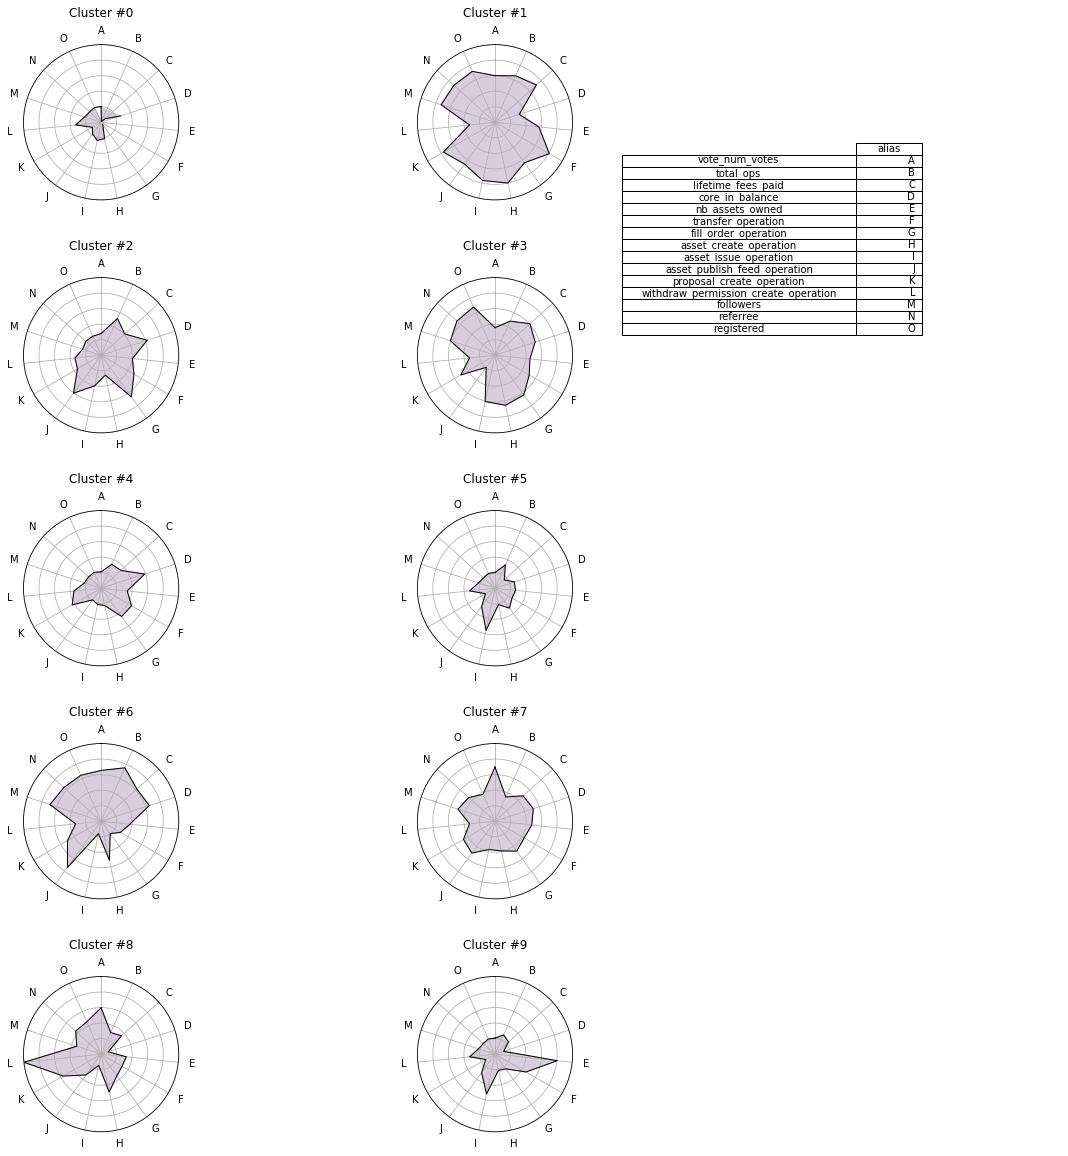

In [135]:
import matplotlib as mpl
import string
from matplotlib import rcParams
from pylab import *

main_features = ['vote_num_votes', 'total_ops', 'lifetime_fees_paid', 'core_in_balance', 'nb_assets_owned', 'transfer_operation', 'fill_order_operation', 'asset_create_operation', 'asset_issue_operation', 'asset_publish_feed_operation', 'proposal_create_operation', 'withdraw_permission_create_operation', 'followers', 'referree', 'registered']
N = len(main_features)

cmp = plt.get_cmap('viridis', 3)
fig = plt.figure(figsize=(20,20))
grid = plt.GridSpec(5, 3, hspace=0.5, wspace=0.2)
fig.tight_layout()
rcParams['axes.titlepad'] = 20 

 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i in range(df_radar.shape[0]):
    rgb = cmp(0)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    row = i // 2
    column = i % 2
    ax = fig.add_subplot(grid[row:row+1, column:column+1], polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], string.ascii_uppercase[0:N])
    plt.xticks(fontsize=10)
    # Draw ylabels
    ax.set_yticklabels([])
    
    #ax.set_xlim([xmin,xmax])
    ax.set_ylim([-2,3])

    # # Plot each individual = each line of the data
    values = df_radar[main_features].loc[i].values.flatten().tolist()
    values += values[:1]
    print(values)
    ax.plot(angles, values, linewidth=1, c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2, c=rgb)
    fnt=20
    ax.set_title("Cluster #{}".format(i))

tabax = fig.add_subplot(grid[0:2, 2:3])
tabax.axis("off")
tabax.table(cellText=string.ascii_uppercase[0:N],
            rowLabels=main_features,
            colLabels=['alias'],
            cellLoc = 'right', rowLoc = 'center',
            loc='center', colWidths=[1/5])


TypeError: 'DataFrame' object is not callable

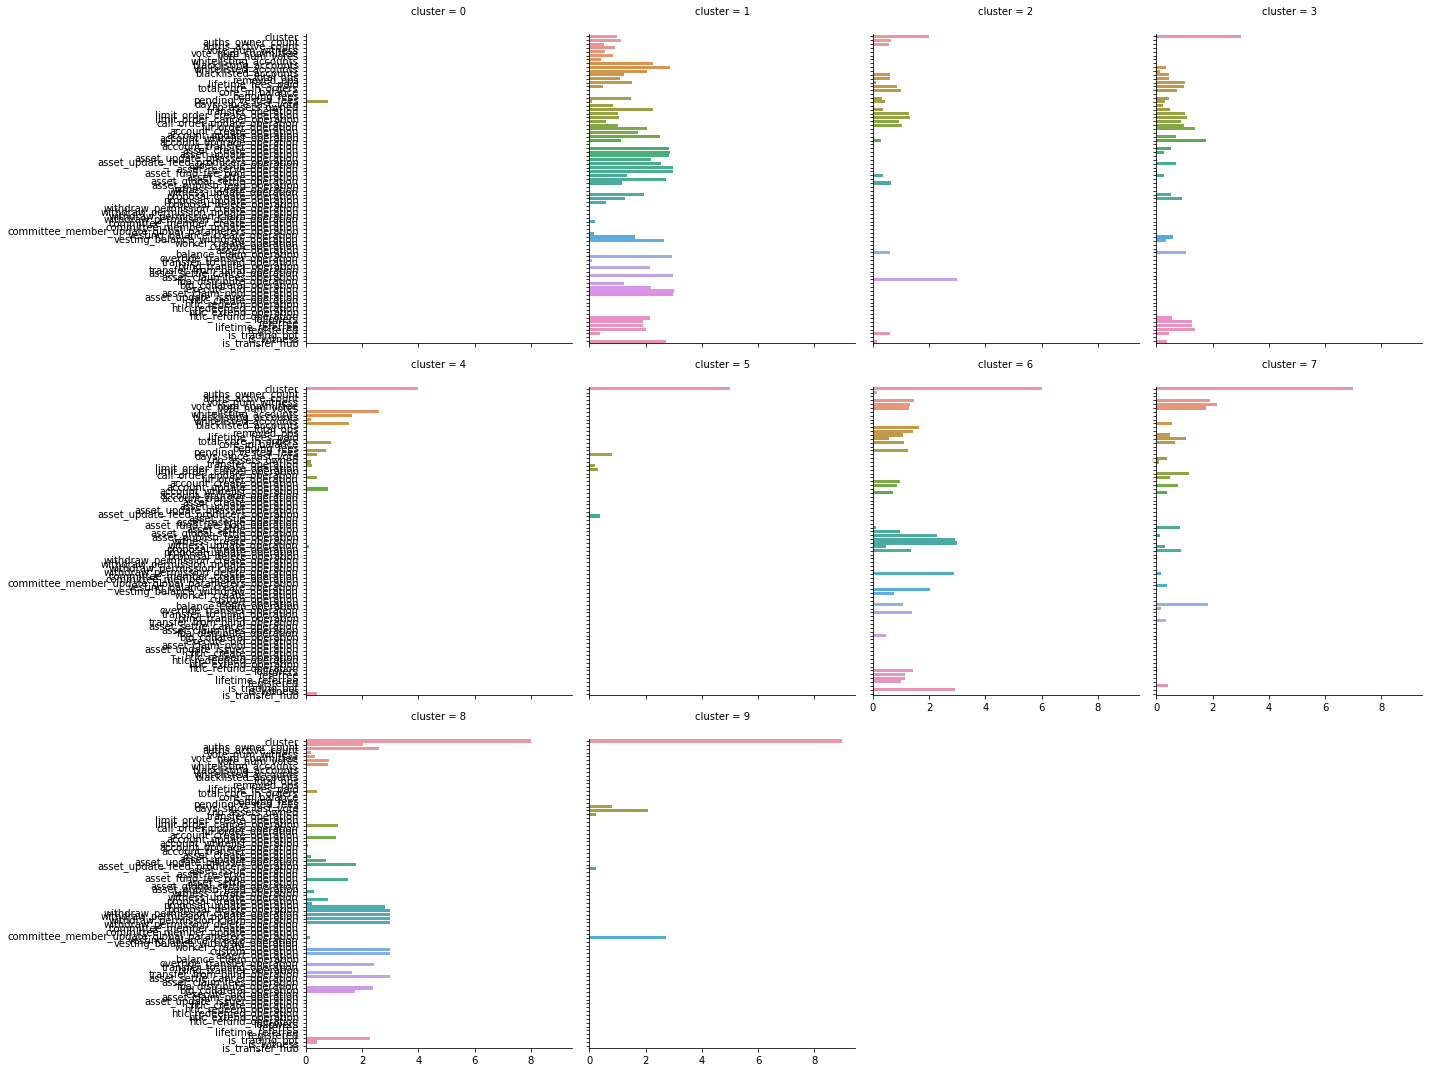

In [111]:
columns = ['cluster', 'vote_num_votes', 'total_ops', 'lifetime_fees_paid', 'core_in_balance', 'nb_assets_owned', 'transfer_operation', 'fill_order_operation', 'asset_create_operation', 'asset_issue_operation', 'asset_publish_feed_operation', 'proposal_create_operation', 'withdraw_permission_create_operation', 'followers', 'referree', 'registered']
df_catplot = df_radar
df_catplot[df_radar<0] = 0
df_catplot = df_catplot.reset_index()
g = sns.catplot(data=df_catplot, kind="bar", orient='h', col="cluster", col_wrap=4, row_order=columns)